In [75]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import pickle
import gzip
from matplotlib import rc
from matplotlib.lines import Line2D
import warnings

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

Simulation af Sine Circle Map

In [3]:
def simulating_sine_circle_map(theta_start, antal_iterationer, Omega, A_ext):
    T_int = 8
    T_ext = Omega * T_int
    
    theta = [theta_start]
    iterationer = np.arange(antal_iterationer + 1)

    for i in range(antal_iterationer):
        theta_next = theta[i] - A_ext*np.sin(theta[i]) + 2*np.pi * Omega
        theta.append(theta_next)

    return np.array(iterationer), np.array(theta)

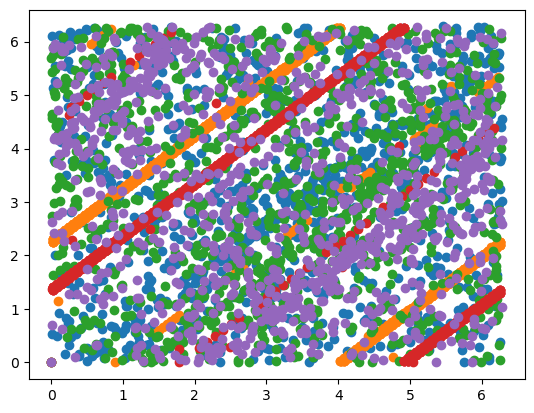

In [71]:
PTC_sim1 = simulating_sine_circle_map(0, 1000, 0.5,3)
theta1_n = PTC_sim1[1]
theta_midlertidig1 = np.concatenate(([0], theta1_n))
theta1_nplusen = theta_midlertidig1[:-1]

PTC_sim2 = simulating_sine_circle_map(0, 1000, 1,3)
theta2_n = PTC_sim2[1]
theta_midlertidig2 = np.concatenate(([0], theta2_n))
theta2_nplusen = theta_midlertidig2[:-1]

PTC_sim3 = simulating_sine_circle_map(0, 1000, 1.5,3)
theta3_n = PTC_sim3[1]
theta_midlertidig3 = np.concatenate(([0], theta3_n))
theta3_nplusen = theta_midlertidig3[:-1]

PTC_sim4 = simulating_sine_circle_map(0, 1000, 2,3)
theta4_n = PTC_sim4[1]
theta_midlertidig4 = np.concatenate(([0], theta4_n))
theta4_nplusen = theta_midlertidig4[:-1]

PTC_sim5 = simulating_sine_circle_map(0, 1000, 2.5,3)
theta5_n = PTC_sim5[1]
theta_midlertidig5 = np.concatenate(([0], theta5_n))
theta5_nplusen = theta_midlertidig5[:-1]

plt.figure()
# plt.xlim(0,20)
# plt.ylim(0,20)
plt.scatter(theta1_n % 2*np.pi,theta1_nplusen % 2*np.pi)
plt.scatter(theta2_n % 2*np.pi,theta2_nplusen % 2*np.pi)
plt.scatter(theta3_n % 2*np.pi,theta3_nplusen % 2*np.pi)
plt.scatter(theta4_n % 2*np.pi,theta4_nplusen % 2*np.pi)
plt.scatter(theta5_n % 2*np.pi,theta5_nplusen % 2*np.pi)

In [556]:
sim = simulating_sine_circle_map(0, 100, 0.01, 5)
sim2 = simulating_sine_circle_map(1, 150, 0.6, 0.9)
sim3 = simulating_sine_circle_map(1, 200, 0.6, 0.9)

print(sim[1][-1]/(2*np.pi)/100, sim2[1][-1]/2*np.pi/1500, sim3[1][-1]/2*np.pi/2000)
len(sim[1])

0.054977976335393544 0.6004245587267257 0.5998379845108108


101

Checking entrainment:

In [112]:
def entrainment_sine(omega_list, coupling_list):
    sine_map_dict = {"Omega": [], "coupling_strength": [], "entrainment_value": [], "exception": []}
    A_int = 1
    A_ext_list = coupling_list * A_int

    for i in tqdm(range(len(omega_list)), desc="Processing"):
        for j in range(len(A_ext_list)):
            antal_iterationer = 400 #svarer til antallet af peaks
            theta_start = 0
            simulation_sine = simulating_sine_circle_map(theta_start, antal_iterationer, omega_list[i], A_ext_list[j])
            sim_iterationer, sim_theta = simulation_sine[0], simulation_sine[1]

            rotation_number = 0
            exception = False
            
            try:
                rotation_number = sim_theta[-1] / (2*np.pi ) / (antal_iterationer) # Redegør for, hvorfor det er antal_sim * 10
            except:
                exception = True
            
            sine_map_dict["Omega"].append(omega_list[i])
            sine_map_dict["coupling_strength"].append(coupling_list[j])
            sine_map_dict["entrainment_value"].append(rotation_number)
            sine_map_dict["exception"].append(exception)
        
    return sine_map_dict

In [116]:
# Startbetingelser for den interne oscillator findes pt. inden i definitionerne

antal_omega = 200
antal_coupling = 200

# Der laves gridsearch på disse omega og coupling
omega_list = np.linspace(0,3,antal_omega)
coupling_list = np.linspace(0,5,antal_coupling)

entrainment_sim = entrainment_sine(omega_list, coupling_list)

Processing:   0%|          | 0/200 [00:00<?, ?it/s]

Processing: 100%|██████████| 200/200 [00:32<00:00,  6.10it/s]


Plotting:

In [119]:
Omegas_tested = entrainment_sim["Omega"]
Coupling_strengths_tested = entrainment_sim["coupling_strength"]
Entrainments = np.array(entrainment_sim["entrainment_value"])
Exceptions = entrainment_sim["exception"]

threshold = 0.025
tunger = [0, 0.5, 1, 1.5, 2, 2.5, 3]
tunger_v2 = np.linspace(0.1,3,30)

colors = ['C0', 'C1', 'C2', 'C6', 'C7', 'C8', 'C9']
colors_v2 = ["red", "orange", "blue", "magenta", "green", "cyan", "darkviolet"]
arnold_color_scheme = ["#548687", "#56445D", "#A26769", "#9CB380", "#508AA8", "#C8EAD3", "#31474D", '#DAE0DC']
label = ["0", fr"$\frac{1}{2}$", "1", fr"$\frac{3}{2}$", "2", fr"$\frac{5}{2}$", "3", fr"$n\cdot0.1$"] 

def get_color_map(Entrainments, tunger, threshold, colors):
    color_map = []

    for entrainment in tqdm(Entrainments, "Processing"):
        # Initialize the color to white (default color)
        color = 'white'

        # Check if entrainment falls within any of the specified ranges
        for i, start in enumerate(tunger_v2):
            if start - threshold <= entrainment <= start + threshold:
                color = '#DAE0DC'
                break  # Break out of the loop once a matching range is found

        # Check if entrainment falls within any of the specified ranges
        for i, start in enumerate(tunger):
            if start - threshold <= entrainment <= start + threshold:
                color = arnold_color_scheme[i]
                break  # Break out of the loop once a matching range is found

        color_map.append(color)

    return color_map

color_map = get_color_map(Entrainments, tunger, threshold, colors)

Processing:   0%|          | 0/40000 [00:00<?, ?it/s]

Processing: 100%|██████████| 40000/40000 [00:00<00:00, 60324.18it/s]


Processing: 0it [00:00, ?it/s]
/var/folders/sh/2tb9lygj0hd_5707cy_mb_gc0000gn/T/ipykernel_21056/2980093233.py:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [40]  # Increase marker size for better visibility


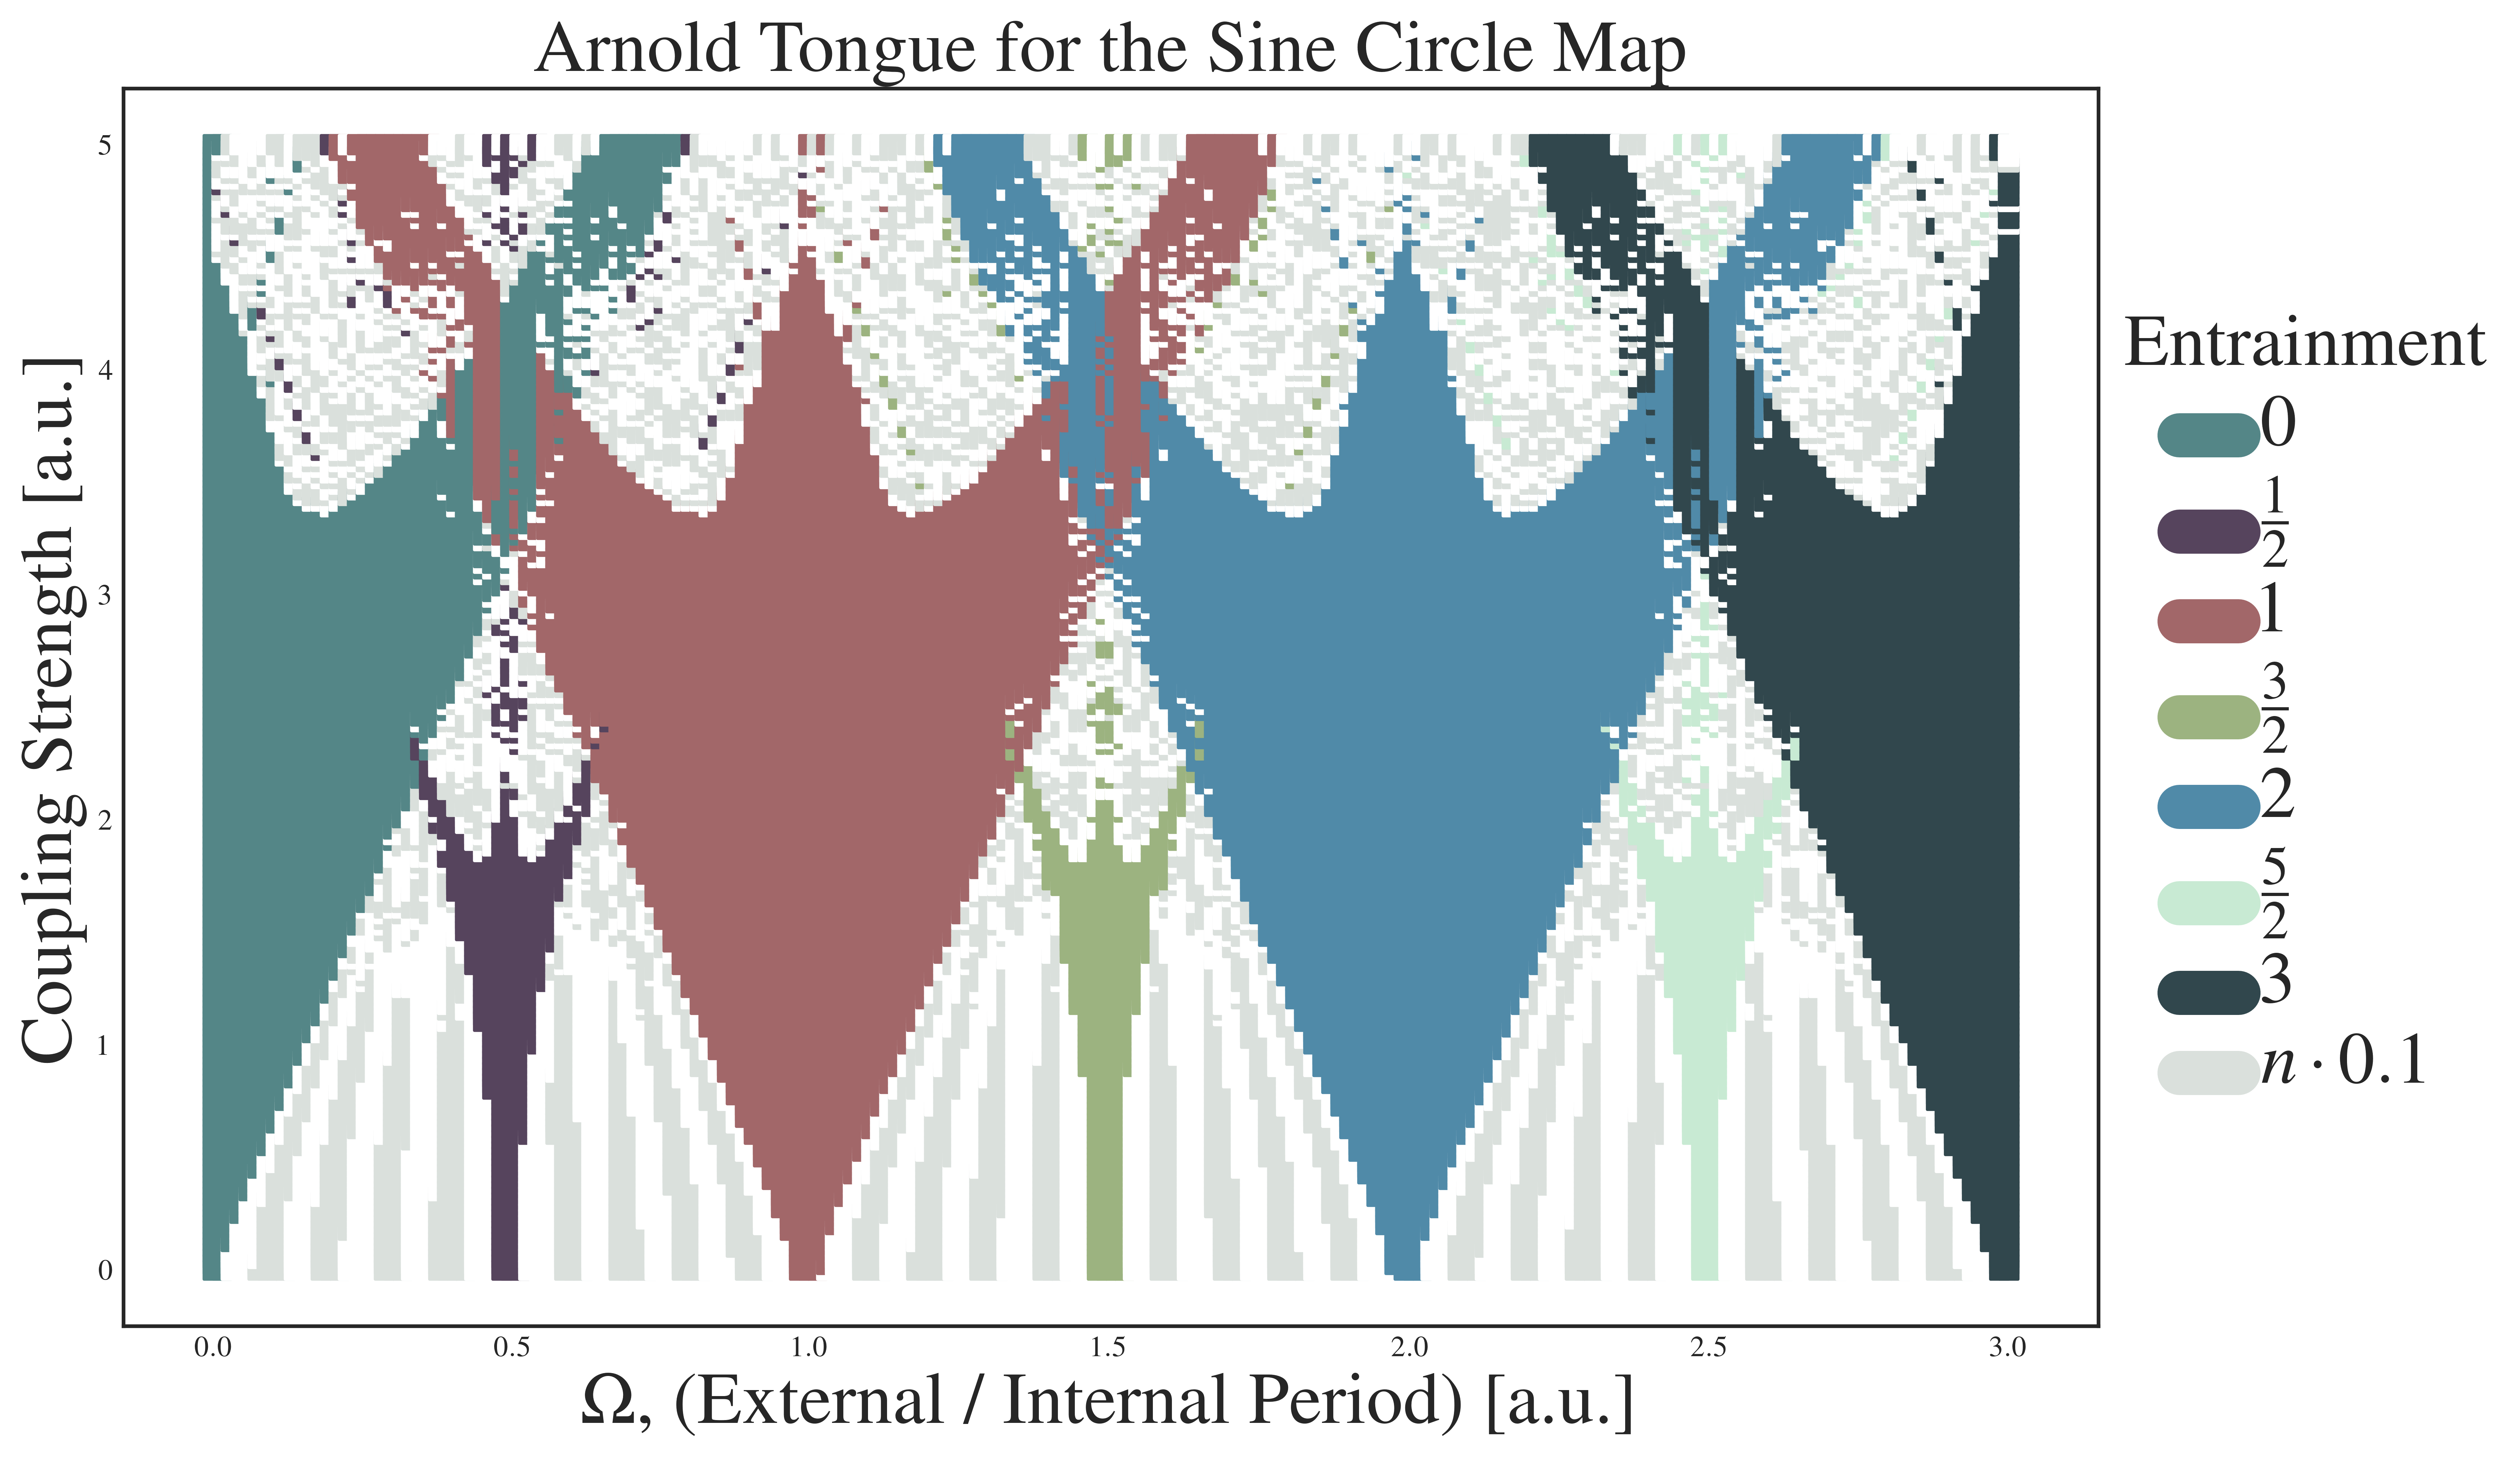

In [120]:
plt.figure(figsize=(11,7), dpi=600)

tqdm(plt.scatter(Omegas_tested, Coupling_strengths_tested, c=color_map, s=40, marker="s"), "Processing")

handles = []
for i in range(len(arnold_color_scheme)):
    line = Line2D([], [], color=arnold_color_scheme[i], lw=15, label=label[i])
    handles.append(line)

plt.title("Arnold Tongue for the Sine Circle Map", fontsize=25)
plt.ylabel("Coupling Strength [a.u.]", fontsize=25)
plt.xlabel(rf"$\Omega$, (External / Internal Period) [a.u.]", fontsize=25)
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Entrainment')
plt.tight_layout()

legend.legendHandles[0]._sizes = [40]  # Increase marker size for better visibility
legend.get_frame().set_linewidth(30)  # Increase border width
legend.get_title().set_fontsize(25)  # Increase title font size
for text in legend.get_texts():
    text.set_fontsize(25)  # Increase label font size


Skævhed til venstre, hvor kommer det fra?!

In [297]:
første_sim = simulating_sine_circle_map(4, 1000, 1, 3)

In [298]:
første_sim[1][-1]

6290.964274054988

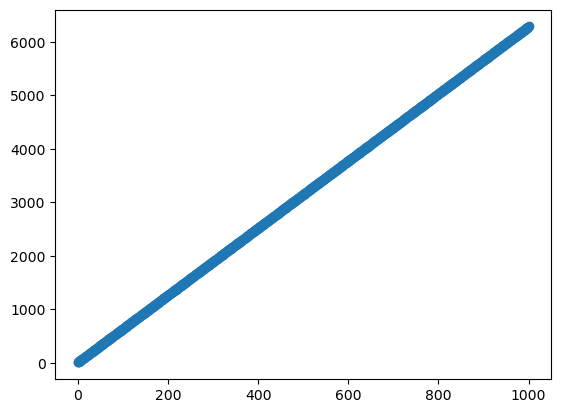

In [299]:
plt.scatter(første_sim[0], første_sim[1])

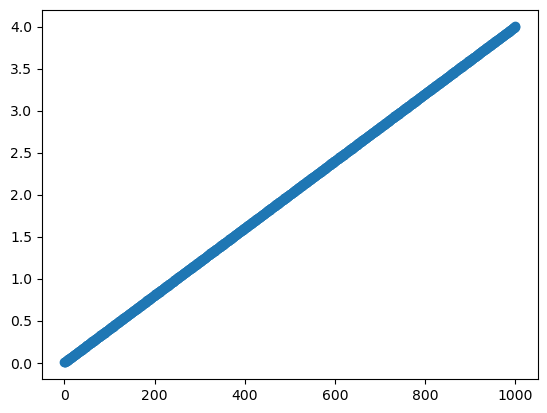

In [300]:
rotation = (første_sim[1] / np.pi*2) / len(første_sim[1])
dummy = np.arange(len(rotation))
plt.scatter(dummy, rotation)

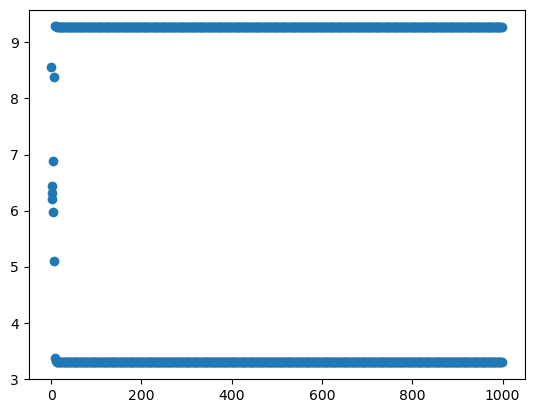

In [107]:
plt.scatter(np.arange(len(np.diff(første_sim[1]))),np.diff(første_sim[1]))

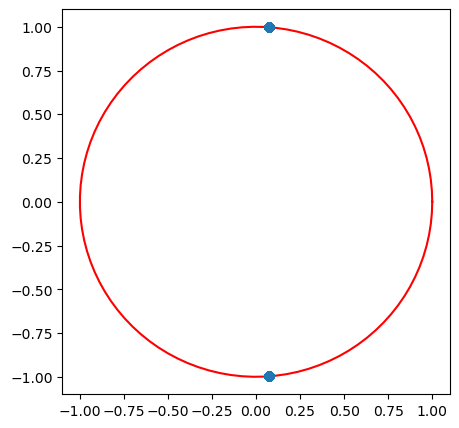

In [109]:
plt.figure(figsize=(5,5))
plt.scatter(np.cos(første_sim[1][200:1000]),np.sin(første_sim[1][200:1000]), zorder=3)

dummy_vinkel = np.linspace(0,2*np.pi,100)
xdummy = np.cos(dummy_vinkel)
ydummy = np.sin(dummy_vinkel)

plt.plot(xdummy, ydummy, color="red")